<a href="https://colab.research.google.com/github/candelamg/machine_learning_supervisado/blob/main/Copia_de_Definitiva_ejecucion_candela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: Loan

In [ ]:
nombres = "María Losa Martín, Candela Manjón Galiano y José Partal Escalona"
print("La práctica ha sido realizada por:", nombres)

La práctica ha sido realizada por: María Losa Martín, Candela Manjón Galiano y José Partal Escalona


Vamos a cargar los datos desde Google Drive para acelerar esta parte del proceso.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')  

Mounted at /content/drive


Vamos a importar un archivo con las funciones auxiliares que usaremos a lo largo del trabajo.

In [ ]:
%run "/content/drive/My Drive/ML_P1/funciones_auxiliares.ipynb"

# Data Lending club

Lending Club es una de las empresas P2P más grandes, publica regularmente conjuntos de datos anonimizados de sus clientes que contienen características de los préstamos y los prestatarios. Esta información se puede utilizar para clasificar si un prestatario incumplirá o no con su préstamo.

Por ejemplo, los bancos suelen tener datos informativos para crear modelos que ayuden a decidir a quién conceder o denegar un préstamo. Es un problema de clasificación supervisado.

#### Definición del problema:

Se desea predecir, antes de conceder un préstamo a una persona, la probabilidad de que no se devuelva completamente. Por tanto, todas las variables del dataset que se empleen para el modelo, deben poderse utilizar en el momento de su llamada. Para ello, se empleará un algoritmo de clasificación supervisado.
El fichero `Data_Dictionary.xls` contiene todas las variables y sus descripciones a utilizar en el modelo de clasificación.

El conjunto de datos se encuentra en el fichero `pd_data_initial_preprocessing.csv`
La variable objetivo a predecir, que define si un cliente pagará una hipoteca o no es `loan_status`.

## Análisis descriptivo de los datos

1.- Hacer un pequeño análisis descriptivo de los datos. Un análisis sencillo que incluya simplemente: (0,5 pts)

- Cantidad de valores nulos.
- Tipo de variables (cat, float, etc.)
- En la variable objetivo, distribución de sus valores.
- Matriz de correlación en variables continuas.


Cargamos algunas librerías básicas que nos serán de utilidad a lo largo del trabajo:

In [ ]:
import pandas as pd 
import matplotlib as mpl  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Cargamos los datos 

In [ ]:
pd_loan = pd.read_csv("/content/drive/MyDrive/ML_P1/pd_data_initial_preprocessing.csv", low_memory=False)\
                  .set_index(['id', 'url', 'zip_code'])

In [ ]:
pd_loan

,,,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,open_il_12m,total_bal_il,open_rv_12m,open_rv_24m,open_il_24m,inq_last_12m,mths_since_last_major_derog,mths_since_recent_revol_delinq,mths_since_last_delinq,emp_title,emp_length,mo_sin_old_il_acct,revol_util,dti,verification_status,annual_inc,home_ownership,sub_grade,grade,term,int_rate,installment,loan_status,total_acc,purpose,addr_state,fico_range_low,fico_range_high,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
id,url,zip_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
112435993,https://lendingclub.com/browse/loanDetail.action?loan_id=112435993,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,55.1,21.61,Not Verified,10000.0,OWN,1.0,C,36.0,12.62,77.08,Current,6.0,credit_card,NY,700.0,704.0,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
112290210,https://lendingclub.com/browse/loanDetail.action?loan_id=112290210,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,6.0,2.0,1.0,0.0,11078.0,3.0,5.0,0.0,1.0,NaN,NaN,NaN,teacher,10.0,26.0,105.8,25.61,Not Verified,94000.0,MORTGAGE,1.0,C,60.0,12.62,360.95,Current,26.0,debt_consolidation,MA,715.0,719.0,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
112436985,https://lendingclub.com/browse/loanDetail.action?loan_id=112436985,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,5.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN,Front Office,7.0,86.0,44.9,8.88,Not Verified,46350.0,MORTGAGE,4.0,C,36.0,15.05,209.01,Current,27.0,home_improvement,MA,700.0,704.0,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
112439006,https://lendingclub.com/browse/loanDetail.action?loan_id=112439006,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,1.0,1.0,10.0,1.0,53566.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,Manager,10.0,125.0,18.7,27.06,Source Verified,44000.0,RENT,1.0,B,36.0,9.44,652.91,Current,19.0,car,CA,760.0,764.0,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
112438929,https://lendingclub.com/browse/loanDetail.action?loan_id=112438929,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,0.0,0.0,1.0,0.0,8466.0,0.0,1.0,0.0,0.0,16.0,16.0,16.0,Paramedic,10.0,160.0,88.0,6.79,Source Verified,85000.0,MORTGAGE,5.0,B,36.0,11.99,431.73,Current,24.0,debt_consolidation,MN,660.0,664.0,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36271333,https://lendingclub.com/browse/loanDetail.action?loan_id=36271333,378xx,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radiologist Technologist,5.0,134.0,61.3,30.90,Verified,35000.0,RENT,2.0,D,60.0,15.99,316.07,Charged Off,22.0,debt_consolidation,TN,680.0,684.0,w,Individual,1.0,1.0,13000.0,0.0,108.0,9.0,9.0,2003.0
36490806,https://lendingclub.com/browse/loanDetail.action?loan_id=36490806,010xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,22.0,Painter,1.0,56.0,30.6,27.19,Source Verified,64400.0,RENT,3.0,E,60.0,19.99,317.86,Charged Off,20.0,debt_consolidation,MA,695.0,699.0,w,Individual,0.0,0.0,12000.0,0.0,83.0,17.0,10.0,2003.0
36271262,https://lendingclub.com/browse/loanDetail.action?loan_id=36271262,331xx,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manager Hotel Operations Oasis,10.0,146.0,79.8,10.83,Verified,100000.0,RENT,5.0,B,36.0,11.99,664.20,Fully Paid,10.0,credit_card,FL,675.0,679.0,f,Individual,1.0,0.0,20000.0,0.0,155.0,8.0,12.0,2001.0


In [ ]:
# Dimensión de los datos
print("Tenemos %d observaciones y %d variables." % (pd_loan.shape[0], pd_loan.shape[1]))

Tenemos 884884 observaciones y 48 variables.


Importamos el diccionario asociado al dataframe para poder interpretar las variables

In [ ]:
dictionary_ex = pd.ExcelFile('/content/drive/MyDrive/ML_P1/Data_Dictionary.xlsx')

In [ ]:
dictionary=dictionary_ex.parse('LoanStats')
dictionary.dropna(axis=0)

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,all_util,Balance to credit limit on all trades
2,annual_inc,The self-reported annual income provided by th...
3,annual_inc_joint,The combined self-reported annual income provi...
4,application_type,Indicates whether the loan is an individual ap...
5,desc,Loan description provided by the borrower
6,dti,A ratio calculated using the borrower’s total ...
7,dti_joint,A ratio calculated using the co-borrowers' tot...
8,earliest_cr_line,The month the borrower's earliest reported cre...
9,emp_length,Employment length in years. Possible values ar...


In [ ]:
# Estadísticos descriptivos
pd_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
mths_since_last_record,155100.0,69.193056,26.469788,0.00,51.00,69.00,88.00,1.210000e+02
il_util,216581.0,68.935964,24.314068,0.00,54.00,71.00,86.00,4.640000e+02
mths_since_recent_bc_dlq,225434.0,39.128632,22.793899,0.00,20.00,37.00,58.00,1.950000e+02
mths_since_rcnt_il,242773.0,21.217005,25.439242,0.00,7.00,14.00,24.00,4.330000e+02
all_util,249497.0,58.072927,20.934080,0.00,44.00,59.00,73.00,2.110000e+02
inq_fi,249524.0,0.985092,1.470832,0.00,0.00,0.00,1.00,2.700000e+01
max_bal_bc,249524.0,5746.256717,5503.678029,0.00,2300.00,4397.00,7504.00,5.717930e+05
total_cu_tl,249524.0,1.448702,2.616477,0.00,0.00,0.00,2.00,7.100000e+01
open_acc_6m,249524.0,0.897461,1.106632,0.00,0.00,1.00,1.00,1.600000e+01
open_act_il,249524.0,2.880861,3.088793,0.00,1.00,2.00,3.00,5.500000e+01


Con `pd_loan.info()` podemos hacer una previsualización de las características de nuestras variables, aunque en los siguientes apartados las abordaremos con mayor profundidad.

In [ ]:
pd_loan.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 884884 entries, ('112435993', 'https://lendingclub.com/browse/loanDetail.action?loan_id=112435993', '148xx') to ('Total amount funded in policy code 2: 1944088810', nan, nan)
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   mths_since_last_record          155100 non-null  float64
 1   il_util                         216581 non-null  float64
 2   mths_since_recent_bc_dlq        225434 non-null  float64
 3   mths_since_rcnt_il              242773 non-null  float64
 4   all_util                        249497 non-null  float64
 5   inq_fi                          249524 non-null  float64
 6   max_bal_bc                      249524 non-null  float64
 7   total_cu_tl                     249524 non-null  float64
 8   open_acc_6m                     249524 non-null  float64
 9   open_act_il                     249524 non-null  float6

A continuación, vamos a hacer un análisis básico de los datos.

### Cantidad de valores nulos

Antes de comenzar, vamos a ver el comportamiento de una variable que más adelante puede resultar problemática, para decidir si incluirla o no en nuestro análisis.

In [ ]:
np.unique(pd_loan['emp_title'].astype(str))

array([' \tAdv Mtr Proj Fld Rep', ' \tEmployee Strategies Manager',
       '    Food Preparation Worker', ...,
       'Å\x9ar.  Technical Illustrator',
       '\u200bAssociate Tech Support Analyst',
       '\u200bLicense Compliance Investigator'], dtype=object)

In [ ]:
len(np.unique(pd_loan['emp_title'].astype(str), return_counts=True)[1]) 


214510

Observamos que la variable `emp_title` es una variable categórica que contiene 214510 valores distintos, por lo que no la vamos a considerar en nuestro análisis. Para eliminarla, como vamos a manipular los datos, hacemos una copia de los mismos porque no queremos modificar la muestra original.





In [ ]:
data = pd_loan.copy()

In [ ]:
# Eliminamos la variable emp_title por lo comentado anteriormente
data = data.drop(['emp_title'],axis=1)

In [ ]:
# Veamos la cantidad y porcentaje de datos faltantes tenemos en cada variable
pd_series_null_columns = data.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = data.isnull().sum(axis=1).sort_values(ascending=False)


pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = data['loan_status'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/data.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/data.shape[1]

pd_null_columnas

,nulos_columnas,porcentaje_columnas
mths_since_last_record,729784,0.824723
il_util,668303,0.755244
mths_since_recent_bc_dlq,659450,0.745239
mths_since_rcnt_il,642111,0.725644
all_util,635387,0.718046
total_bal_il,635360,0.718015
inq_last_12m,635360,0.718015
open_il_24m,635360,0.718015
open_rv_24m,635360,0.718015
open_rv_12m,635360,0.718015


In [ ]:
# Otra forma alternativa de ver el número de datos faltantes de cada variable sería:
#print('Número de datos faltantes (missings):\n')
#data.isnull().sum()

### Tipo de variables

In [ ]:
data.dtypes

mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_length                        float64
mo_sin_old_il_acct                float64
revol_util                        float64
dti                               float64
verification_status               

In [ ]:
list_var_cat, other = dame_variables_categoricas(dataset = data)
print('Tenemos %d variables categóricas y el resto son continuas.' % (len(list_var_cat)))

Tenemos 8 variables categóricas y el resto son continuas.


### Variable objetivo

La variable objetivo a predecir, que define si un cliente devolverá el préstamo o no, es `loan_status`. Se trata de una variable discreta que toma diferentes valores como analizamos a continuación.

In [ ]:
pd_plot_loan_status = data['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_loan_status_conteo = data['loan_status'].value_counts().reset_index()
pd_plot_loan_status_pc = pd.merge(pd_plot_loan_status, pd_plot_loan_status_conteo, on=['index'], how='inner')
pd_plot_loan_status_pc

,index,percent,loan_status
0,Current,47.767710,422685
1,Fully Paid,39.047279,345520
2,Charged Off,10.967299,97047
3,Late (31-120 days),1.262098,11168
4,In Grace Period,0.622347,5507
5,Late (16-30 days),0.329425,2915
6,Default,0.003842,34


In [ ]:
# Dibujamos el histograma para ver la distribución
import plotly.express as px
fig = px.histogram(pd_plot_loan_status_pc, x="index", y=['percent'], color="index",color_discrete_sequence=["orange", "blue", "red", "green", "purple", "yellow", "brown"], title="Distribución de los valores (%)")
fig.show()

Observamos que nuestra base de datos está formada principalmente por los préstamos que están actualmente concedidos seguidos de los que ya se han devuelto y de los impagados. Como estamos interesados en analizar si se devuelven o no los préstamos, nosotros nos quedaremos con los finalizados, es decir, con `Fully Paid` y `Charged Off`.

### Matriz de correlación de variables continuas

El próximo paso es analizar la correlación entre variables porque si tenemos dos variables muy correlacionadas, podemos eliminar una de ellas simplificando de este modo el análisis.

In [ ]:
# Cambiamos la denominación de las variables 'object' por variables 'category'
list_var_cat, other = dame_variables_categoricas(dataset = data)
data[list_var_cat] = data[list_var_cat].astype("category")
list_var_continuous = list(data.select_dtypes('float').columns)
data[list_var_continuous] = data[list_var_continuous].astype(float)

In [ ]:
print('Las variables categóricas son :', list_var_cat)
print('Las variables continuas son :', list_var_continuous)

Las variables categóricas son : ['verification_status', 'home_ownership', 'grade', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
Las variables continuas son : ['mths_since_last_record', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'all_util', 'inq_fi', 'max_bal_bc', 'total_cu_tl', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'open_il_24m', 'inq_last_12m', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'emp_length', 'mo_sin_old_il_acct', 'revol_util', 'dti', 'annual_inc', 'sub_grade', 'term', 'int_rate', 'installment', 'total_acc', 'fico_range_low', 'fico_range_high', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt', 'mort_acc', 'mo_sin_old_rev_tl_op', 'open_acc', 'earliest_cr_line_month', 'earliest_cr_line_year']


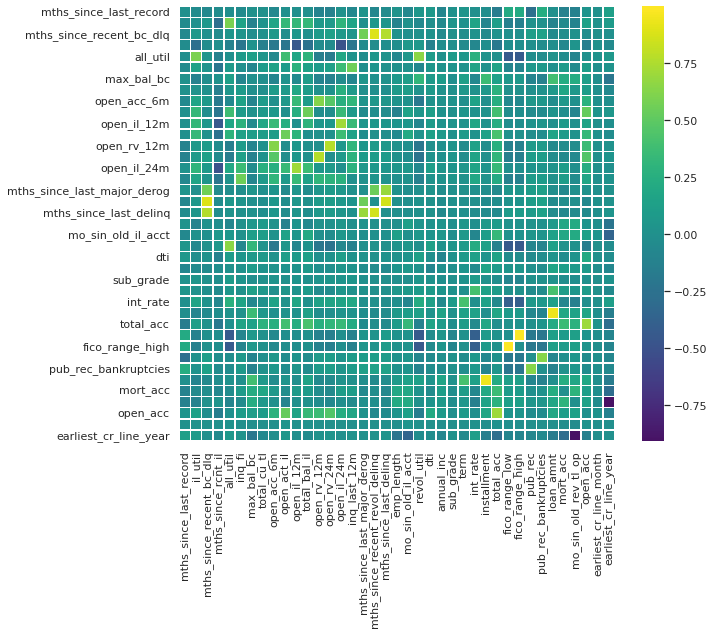

0

In [ ]:
get_corr_matrix(dataset = data[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

Vemos cuántas variables están correladas en más de 0.6:

In [ ]:
corr_features = correlation(data[list_var_continuous], 0.6)
print('correlated features: ', len(set(corr_features)) )

correlated features:  11


A continuación, vemos de forma más detallada cuáles son esas variables entre las que existe correlación:

In [ ]:
corr = data[list_var_continuous].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

,level_0,level_1,correlation
1199,fico_range_high,fico_range_low,1.000000
1314,loan_amnt,installment,0.944278
1517,earliest_cr_line_year,mo_sin_old_rev_tl_op,0.909985
665,mths_since_recent_revol_delinq,mths_since_recent_bc_dlq,0.889991
719,mths_since_last_delinq,mths_since_recent_revol_delinq,0.863747
519,open_rv_24m,open_rv_12m,0.770696
704,mths_since_last_delinq,mths_since_recent_bc_dlq,0.767427
556,open_il_24m,open_il_12m,0.715313
1432,open_acc,total_acc,0.706860
718,mths_since_last_delinq,mths_since_last_major_derog,0.687765


## Tratamiento de datos faltantes

2.- Tratar los valores missing tanto en las variables continuas como discretas de forma correcta. Recordad que si existen muchos valores missing no es adecuado eliminar dichas filas. Como guía, recordad que los valores missing: (0,5 pts)

- En variables continuas se puede  sustituir por  la media o mediana, o por un valor muy distinto al resto de cantidades, que refleje de algún modo que es un valor missing.
- En variables discretas se pueden sustituir por la moda o una clase nueva que indique que no tienen valor, p.e. “SIN VALOR”.
- Puede ser interesante, estudiar y evaluar algunos de los métodos de la librería sklearn.impute, como por ejemplo sklearn.impute.KNNimpute, que realiza una imputación mediante una regresión con KNN.

Vamos a eliminar las variables con más de un 70% de missings. Aunque no es recomendable eliminar filas con muchos datos faltantes, nosotros nos vamos a fijar en las columnas pues consideramos que si una variable tiene este porcentaje de missings, podemos eliminarla ya que si, por ejemplo, es continua e imputamos por la mediana estamos alterando la realidad.

In [ ]:
threshold = 0.7 
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas'] < threshold].index)
data = data.loc[:, list_vars_not_null]
data.shape

(884884, 30)

In [ ]:
# Reemplazamos los valores missing de las variables continuas por la mediana
list_var_continuous_tras_missings = list(data.select_dtypes('float').columns)
data[list_var_continuous_tras_missings] = data[list_var_continuous_tras_missings].apply(lambda x: x.fillna(x.median()))

In [ ]:
data[set(list_var_continuous_tras_missings)].isnull().sum()

mths_since_recent_revol_delinq    0
loan_amnt                         0
emp_length                        0
earliest_cr_line_year             0
mths_since_last_delinq            0
mo_sin_old_rev_tl_op              0
annual_inc                        0
installment                       0
mo_sin_old_il_acct                0
fico_range_high                   0
pub_rec                           0
fico_range_low                    0
total_acc                         0
earliest_cr_line_month            0
mort_acc                          0
term                              0
dti                               0
open_acc                          0
revol_util                        0
pub_rec_bankruptcies              0
int_rate                          0
sub_grade                         0
dtype: int64

In [ ]:
# Una vez que hemos comprobado que ya no tenemos datos faltantes en las varibles continuas vemos
# qué ocurre con las variables categóricas

list_var_cat_tras_missings, other = dame_variables_categoricas(dataset = data)
data[set(list_var_cat_tras_missings)].isna().sum()

application_type       8
grade                  8
home_ownership         8
initial_list_status    8
verification_status    8
purpose                8
loan_status            8
addr_state             8
dtype: int64

In [ ]:
# Reemplazamos los valores missing de las variables categóricas por una clase nueva que indique 
# que no tienen valor
data[list_var_cat_tras_missings] = data[list_var_cat_tras_missings].astype("object").fillna("SIN VALOR").astype("category")

In [ ]:
# Comprobamos que ya no tenemos datos faltantes
data.isnull().sum()

mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
fico_range_low                    0
earliest_cr_line_month            0
open_acc                          0
mo_sin_old_rev_tl_op              0
mort_acc                          0
loan_amnt                         0
pub_rec_bankruptcies              0
pub_rec                           0
application_type                  0
initial_list_status               0
fico_range_high                   0
verification_status               0
addr_state                        0
purpose                           0
total_acc                         0
loan_status                       0
installment                       0
int_rate                          0
term                              0
grade                             0
sub_grade                         0
home_ownership              

## Transformaciones

3.- Transformar las variables continuas, si fuera necesario, y las categóricas correctamente. (0,5 pts)

Como adelantamos anteriormente, vamos a trabajar con los préstamos finalizados.

In [ ]:
data2 = data[(data['loan_status']=='Fully Paid') | 
                  (data['loan_status']=='Charged Off')]
data2.shape

(442567, 30)

In [ ]:
pd_plot_loan_status = data2['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_loan_status_conteo = data2['loan_status'].value_counts().reset_index()
pd_plot_loan_status_pc = pd.merge(pd_plot_loan_status, 
                                  pd_plot_loan_status_conteo, on=['index'], how='inner')
pd_plot_loan_status_pc
fig = px.histogram(pd_plot_loan_status_pc, x="index", y=['percent'], color="index",color_discrete_sequence=["blue", "red"], title="Distribución de los valores (%)")
fig.show()

A continuación transformamos los valores de esta variable para que pase a ser una variable binaria que toma el valor 0 cuando el préstamo se ha devuelto (`Fully Paid`) y 1 cuando no (`Charged Off`).

In [ ]:
data2['loan_status'] = data2['loan_status']\
     .map({'Fully Paid': 0, 'Charged Off': 1}).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pd_plot_loan_status = data2['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_loan_status_conteo = data2['loan_status'].value_counts().reset_index()
pd_plot_loan_status_pc = pd.merge(pd_plot_loan_status, 
                                  pd_plot_loan_status_conteo, on=['index'], how='inner')
pd_plot_loan_status_pc
fig = px.histogram(pd_plot_loan_status_pc, x="index", y=['percent'], color="index",color_discrete_sequence=["blue", "red"], title="Distribución de los valores", width=650)
fig.show()

In [ ]:
data2['loan_status'].value_counts()

0    345520
1     97047
Name: loan_status, dtype: int64

In [ ]:
data2['loan_status'].value_counts(normalize=True)

0    0.780718
1    0.219282
Name: loan_status, dtype: float64

In [ ]:
# Hacemos un gráfico circular para ver visualmente la proporción
import plotly.express as ex
ex.pie(data2['loan_status'], names = 'loan_status',  title='Estado del préstamo') 


Observamos que los datos están desbalanceados, hay una proporción mucho mayor de préstamos pagados que impagados y debemos tenerlo en cuenta porque puede  influir en nuestros modelos.

El siguiente paso consiste en discretizar el resto de variables categóricas y para ello hacemos uso de la herramienta `OrdinalEncoder` que asigna valores enteros en orden alfabético empezando por 0. Podíamos haber usado también `OneHotEncoder`, pero con ello aumentábamos el número de variables y es por ello que nos hemos decidido por la primera opción.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder() # Llamamos al modelo
enc.fit(data2[list_var_cat_tras_missings]) # Ajustamos
data2[list_var_cat_tras_missings] = enc.transform(data2[list_var_cat_tras_missings]) #Transformamos

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 442567 entries, ('112038251', 'https://lendingclub.com/browse/loanDetail.action?loan_id=112038251', '923xx') to ('36271262', 'https://lendingclub.com/browse/loanDetail.action?loan_id=36271262', '331xx')
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   mths_since_recent_revol_delinq  442567 non-null  float64
 1   mths_since_last_delinq          442567 non-null  float64
 2   emp_length                      442567 non-null  float64
 3   mo_sin_old_il_acct              442567 non-null  float64
 4   revol_util                      442567 non-null  float64
 5   dti                             442567 non-null  float64
 6   fico_range_low                  442567 non-null  float64
 7   earliest_cr_line_month          442567 non-null  float64
 8   open_acc                        442567 non-null  float64
 9   mo_sin_old_rev_tl_op       

Eliminamos las variables continuas cuya correlación es mayor que 0.6

In [ ]:
corr_features = correlation(data[list_var_continuous_tras_missings], 0.6)
print('correlated features: ', len(set(corr_features)) )

correlated features:  6


In [ ]:
# Eliminamos las variables correlacionadas
data2.drop(labels = corr_features, axis=1, inplace=True)

data2.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(442567, 24)

Estas son las variables que emplearemos finalmente en nuestros modelos:

In [ ]:
variables = data2.columns
variables

Index(['mths_since_recent_revol_delinq', 'emp_length', 'mo_sin_old_il_acct',
       'revol_util', 'dti', 'fico_range_low', 'earliest_cr_line_month',
       'open_acc', 'mo_sin_old_rev_tl_op', 'mort_acc', 'loan_amnt',
       'pub_rec_bankruptcies', 'application_type', 'initial_list_status',
       'verification_status', 'addr_state', 'purpose', 'loan_status',
       'int_rate', 'term', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc'],
      dtype='object')

In [ ]:
print('Nos hemos quedado finalmente con %d variables, incluyendo la variable objetivo.' %(len(variables)))

Nos hemos quedado finalmente con 24 variables, incluyendo la variable objetivo.


## Train y test

4.- Partir el conjunto de datos en un subconjunto de entrenamiento y otro de test. Recordad, que si la variable objetivo está desbalanceada, es fundamental, realizar una partición que conserve las proporciones originales en cada subconjunto. (0,5pt)

In [ ]:
X = data2.drop('loan_status', axis = 1) # X son las características (variables explicativas)
y = data2['loan_status'] # y es la variable objetivo (target)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .20, random_state = 2, shuffle=True)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (354053, 23)
Datos test:  (88514, 23)


In [ ]:
data_train = pd.concat([X_train,y_train],axis=1)
data_test = pd.concat([X_test,y_test],axis=1)

print(' Train\n', data_train['loan_status'].value_counts(normalize=True))
print(' Test\n', data_test['loan_status'].value_counts(normalize=True))

 Train
 0.0    0.780719
1.0    0.219281
Name: loan_status, dtype: float64
 Test
 0.0    0.780713
1.0    0.219287
Name: loan_status, dtype: float64


In [ ]:
print('Datos entrenamiento: ', y_train.shape)
print('Datos test: ', y_test.shape)

Datos entrenamiento:  (354053,)
Datos test:  (88514,)


In [ ]:
print('Proporción train:%0.3f'%np.mean(y_train))
print('Proporción test: %0.3f'%np.mean(y_test))

Proporción train:0.219
Proporción test: 0.219


#### Escalado de las variables

A continuación vamos a estandarizar/normalizar las variables ya que en algunos algoritmos (como KNN) es imprescindible pues se basan en el cálculo de distancias. En otros algoritmos no es necesario, pero haber estandarizado no influye en el resultado. 

In [ ]:
from sklearn import preprocessing

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

### Undersampling para datos desbalanceados

Al analizar la variable objetivo vimos que los datos estaban desbalanceados, la proporción de préstamos pagados era más del doble que la de los préstamos que no se devolvieron. Es por ello que vamos a rebalancear los datos. En concreto, vamos a recurrir a la técnica de undersampling. Esto es, vamos a eliminar datos de la variable más numerosa. Alternativamente se podía haber recurrido a la técnica de oversampling generando datos de la variable menos numerosa.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler(random_state=0)
X_train_scaled_res, y_train_res = under_sampler.fit_resample(X_train_scaled, y_train)

In [ ]:
print('Dimesiones antes de undersampling: ', y_train.shape)
print('Datos después de undersampling: ', y_train_res.shape)

Dimesiones antes de undersampling:  (354053,)
Datos después de undersampling:  (155274,)


In [ ]:
print('Proporción antes de undersampling: %0.3f'%np.mean(y_train))
print('Proporción después de undersampling: %0.3f'%np.mean(y_train_res))

Proporción antes de undersampling: 0.219
Proporción después de undersampling: 0.500


Observamos que el número de observaciones se ha reducido a la mitad y que la proporción de préstamos pagados e impagados es la misma.

## Algoritmos

5.- Vamos a evaluar diferentes algoritmos de clasificación, para los cuales necesitaremos hacer los siguientes pasos:

	1.	Realizar algún tipo de transformación como escalado o normalización, si el método lo necesita.
	2.	Entrenar el modelo con el conjunto de datos de entrenamiento.
	3.	Mostrar cómo de bueno ha sido el entrenamiento.
	4.	Evaluar el modelo con el conjunto de datos de test. 
	
Para ellos se pedirán las siguiente métricas:
- Accuracy
- Precision
- Recall
- Confusion Matrix
- F-SCORE
- Curva ROC
- Area bajo la curva.

**Todos estos pasos serán necesarios evaluarlos para cada uno de los siguientes algoritmos:**

	A.	Regresión logística (1 pt)
	B.	K-NN (1pt)
	C.	Arbol de decisión simple (1pt)
	D.	Bagging Classifier (1pt)
	E.	Random Forest (1pt)
	F.	GradientBoost (1pt)
	G.	XGBoost. (1pt)

Como consideración a tener en cuenta, comentar que en clase se han visto los 3 primeros algoritmos y eran los que se solicitaban para esta práctica. Usando material online y con la ayuda de los recursos del Campus Virtual, hemos incluido Bagging Classifier, Random Forest y GradientBoost con tal de hacer un análisis más detallado.

### A. Regresión logística (1 pt)


best mean cross-validation score: 0.657
best parameters: {'C': 1.9952623149688788}


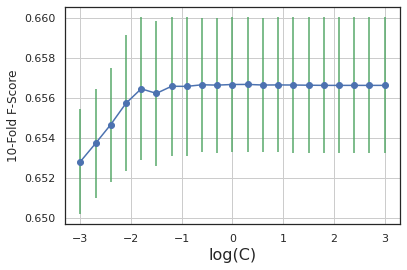

In [ ]:
## TARDA 1' 28'' 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # Gridsearch busca todas las combinaciones de parámetros y valora el resultado
from sklearn.metrics import accuracy_score

vectorC = np.logspace(-3,3,21)

# DEFINIMOS EL DICCIONARIO: ponemos como key el nombre del parámetro
param_grid = {'C': vectorC } # El parámetro C condiciona el resultado. 
# Los hiperparámetros se deben seleccionar antes de aplicar al modelo. Restringimos al seleccionarlos. 
# Evaluamos distintos parámetros para quedarnos con el mejor

grid = GridSearchCV(LogisticRegression(random_state = 0, class_weight='balanced'),
                    #Lo balancea con una proporción determinada
                    scoring = 'f1', #F1 score es de los más interesantes, permite trabajar con el balanceo,---
                    #Otras métricas serían: F1 score del caso positivo y F1 score del negativo
                    #Logistic tiene varios predefinidos pero podríamos definir otros
                    param_grid = param_grid, 
                    cv = 5) 

grid.fit(X_train_scaled_res, y_train_res) #Ajustamos el modelo al conjunto de entrenamiento

#Crossvalidation sirve para evaluar los modelos de forma más robusta
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr = std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-Score')
plt.grid()
plt.show()

# best mean cross-validation score: 0.657
# best parameters: {'C': 0.25118864315095796

In [ ]:
Copt = grid.best_params_['C']

#Hacemos transform y fit a la vez
lr = LogisticRegression(random_state=0, C = Copt, class_weight ='balanced').fit(X_train_scaled_res, y_train_res)
y_pred_logr = lr.predict(X_test_scaled)

In [ ]:
# Modelo con el conjunto de datos de entrenamiento
print("Train: ",lr.score(X_train_scaled_res,y_train_res))

Train:  0.6622164689516596


**Métricas:**

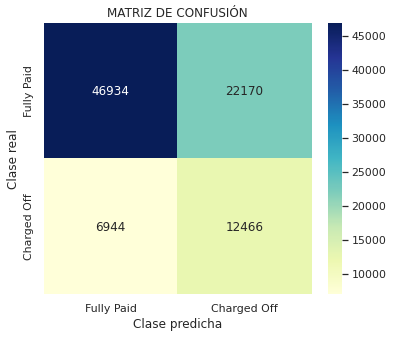

In [ ]:
## Matriz de confusión

from sklearn.metrics import confusion_matrix

LABELS = ["Fully Paid","Charged Off"]
confmat_test_logr = confusion_matrix(y_test, y_pred_logr)

plt.figure(figsize=(6, 5)) # Tamaño de la figura
sns.set(font_scale=1) # Para el tamaño de la letra
sns.heatmap(confmat_test_logr, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu"); # Hacemos un mapa de calor para visualizar mejor la matriz
plt.title("MATRIZ DE CONFUSIÓN")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

In [ ]:
print("Atendiendo a la diagonal de la matriz, de %d casos, predecimos correctamente %d. Sin embargo, hay un total de %d observaciones mal clasificadas." % (X_test_scaled.shape[0], confmat_test_logr[0,0] + confmat_test_logr[1,1],confmat_test_logr[0,1]+ confmat_test_logr[1,0] ))
print("Haciendo el cociente, tenemos el accuracy: %f." % ((confmat_test_logr[0,0] + confmat_test_logr[1,1])/X_test_scaled.shape[0]))
print("En cuanto a los elementos que no se encuentran en la diagonal tenemos que %d préstamos pagados han sido clasificados como impagados y %d impagados han sido clasificados como pagados. " % (confmat_test_logr[0,1], confmat_test_logr[1,0]))

Atendiendo a la diagonal de la matriz, de 88514 casos, predecimos correctamente 59400. Sin embargo, hay un total de 29114 observaciones mal clasificadas.
Haciendo el cociente, tenemos el accuracy: 0.671080.
En cuanto a los elementos que no se encuentran en la diagonal tenemos que 22170 préstamos pagados han sido clasificados como impagados y 6944 impagados han sido clasificados como pagados. 


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

prec_logr = precision_score(y_test,y_pred_logr)
acc_logr = accuracy_score(y_test,y_pred_logr)
recall_logr = recall_score(y_test,y_pred_logr)
f1_logr = f1_score(y_test,y_pred_logr)

print('Accuracy del modelo: ', acc_logr)
print('Precisión del modelo', prec_logr)
print('Recall del modelo es: ', recall_logr)
print('F1_score del modelo es: ', f1_logr)

Accuracy del modelo:  0.671080281085478
Precisión del modelo 0.3599145397851946
Recall del modelo es:  0.6422462648119526
F1_score del modelo es:  0.4613107352995597


ACC:  0.671080281085478
SEN:  0.6422462648119526
ESP:  0.6791792081500347
PPV:  0.3599145397851946
FSC:  0.4613107352995597


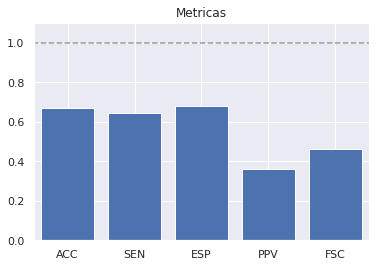

In [ ]:
calcula_metricas(confmat_test_logr)

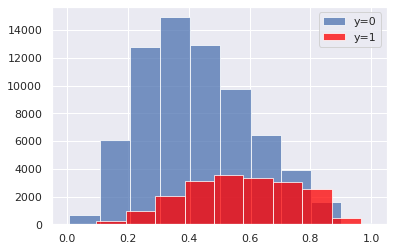

In [ ]:
y_prob_logr = lr.predict_proba(X_test_scaled)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_logr[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_logr[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend(loc=1)
plt.show()

**Curva ROC**

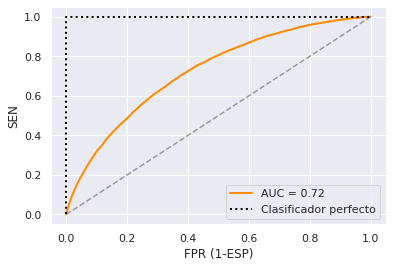

In [ ]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob_logr)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_logr = roc_auc
print('El área bajo la curva ROC es:', roc_auc_logr)

El área bajo la curva ROC es: 0.723409793289634


**Curva Precision-Recall**

Logistic: auc=0.417


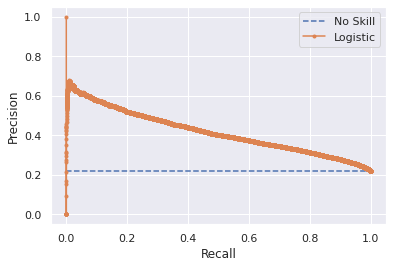

In [ ]:
from sklearn.metrics import precision_recall_curve

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob_logr) 
lr_auc = auc(lr_recall, lr_precision)
# Imprimimos AUC
print('Logistic: auc=%.3f' %lr_auc)

# Dibujamos la curva para el modelo
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Mostramos el gráfico
plt.show()

### B. K-NN (1 pt)

Hemos realizado una búsqueda óptima del hiperparámetro K usando Cross Validation y Grid Search. El coste computacional de este algoritmo es muy alto y tras muchas pruebas hemos obtenido que el valor óptimo de K es 159. Se sugiere la introducción manual de dicho hiperparámetro para reducir el tiempo de ejecución (dejamos comentado el código del GridSearchCV para que no se ejecute automáticamente).

In [ ]:
#TARDA 2h 10min
from sklearn.neighbors import KNeighborsClassifier # Importamos el método

from sklearn import metrics # Importamos las métricas
#Búsqueda del hiperparámetro k con CV

from sklearn.model_selection import GridSearchCV

#Definimos el modelo
knn = KNeighborsClassifier()

#Definimos las rejillas como un diccionario. 
ks = list(range(130, 150)) #tarda 18 minutos
h_parameters = {'n_neighbors':ks}

#Definimos la búsqueda + CV, con la métrica a optimizar
cv = GridSearchCV(knn, h_parameters, cv = 5, n_jobs = -1, scoring='accuracy')

#Ajustamos
cv.fit(X_train_scaled_res,y_train_res) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [130, 131, 132, 133, 134, 135, 136, 137,
                                         138, 139, 140, 141, 142, 143, 144, 145,
                                         146, 147, 148, 149]},
             scoring='accuracy')

In [ ]:
# Este atributo nos devuelve el mejor estimador
cv.best_estimator_

KNeighborsClassifier(n_neighbors=139)

In [ ]:
Kopt = cv.best_params_['n_neighbors']

In [ ]:
# TARDA 3'
from sklearn.neighbors import KNeighborsClassifier # Importamos el método

# Renombramos el modelo con los parametros que hemos obtenido como knn en el primer código para no complicar la comprensión
knn = KNeighborsClassifier(n_neighbors = Kopt)
knn.fit(X_train_scaled_res, y_train_res)
y_pred_knn = knn.predict(X_test_scaled) 

In [ ]:
# Tarda 6'
# Modelo con el conjunto de datos de entrenamiento
print("Train: ", knn.score(X_train_scaled_res,y_train_res))

Train:  0.6596790190244343


**Métricas:**

In [ ]:
prec_knn = precision_score(y_test,y_pred_knn)
acc_knn = accuracy_score(y_test,y_pred_knn)
recall_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

print('Accuracy del modelo: ', acc_knn)
print('Precisión del modelo', prec_knn)
print('Recall del modelo es: ', recall_knn)
print('F1_score del modelo es: ', f1_knn)

Accuracy del modelo:  0.6555460153196104
Precisión del modelo 0.34712294742652133
Recall del modelo es:  0.6480164863472437
F1_score del modelo es:  0.4520801509569593


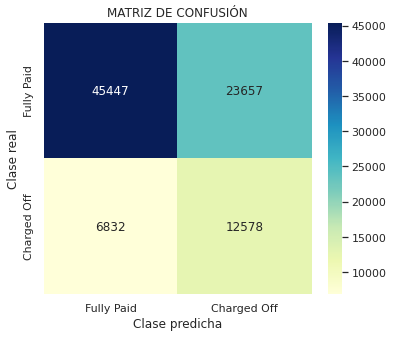

In [ ]:
LABELS = ["Fully Paid","Charged Off"]
confmat_test_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5)) # Tamaño de la figura
sns.set(font_scale=1) # Para el tamaño de la letra
sns.heatmap(confmat_test_knn, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu"); # Hacemos un mapa de calor para visualizar mejor la matriz
plt.title("MATRIZ DE CONFUSIÓN")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

In [ ]:
print("Atendiendo a la diagonal de la matriz, de %d casos, predecimos correctamente %d. Sin embargo, hay un total de %d observaciones mal clasificadas." % (X_test_scaled.shape[0], confmat_test_knn[0,0] + confmat_test_knn[1,1],confmat_test_knn[0,1]+ confmat_test_knn[1,0] ))
print("Haciendo el cociente, tenemos el accuracy: %f." % ((confmat_test_knn[0,0] + confmat_test_knn[1,1])/X_test_scaled.shape[0]))
print("En cuanto a los elementos que no se encuentran en la diagonal tenemos que %d préstamos pagados han sido clasificados como impagados y %d impagados han sido clasificados como pagados. " % (confmat_test_knn[0,1], confmat_test_knn[1,0]))

Atendiendo a la diagonal de la matriz, de 88514 casos, predecimos correctamente 58025. Sin embargo, hay un total de 30489 observaciones mal clasificadas.
Haciendo el cociente, tenemos el accuracy: 0.655546.
En cuanto a los elementos que no se encuentran en la diagonal tenemos que 23657 préstamos pagados han sido clasificados como impagados y 6832 impagados han sido clasificados como pagados. 


ACC:  0.6555460153196104
SEN:  0.6480164863472437
ESP:  0.6576609168789072
PPV:  0.34712294742652133
FSC:  0.4520801509569593


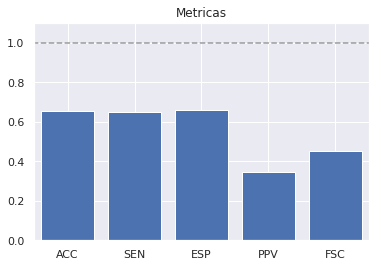

In [ ]:
calcula_metricas(confmat_test_knn)

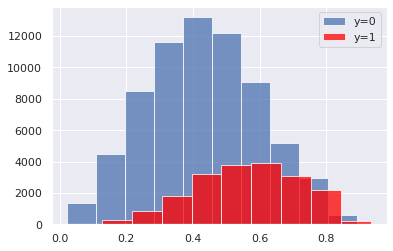

In [ ]:
# TARDA 4'
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_knn[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_knn[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend(loc=1)
plt.show()

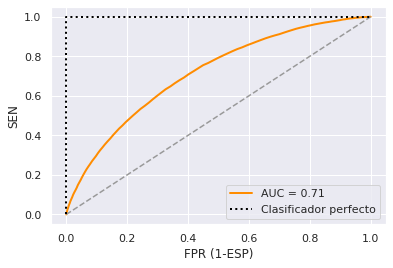

In [ ]:
ejex, ejey, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_knn = roc_auc
print('El área bajo la curva ROC es:', roc_auc_knn)

El área bajo la curva ROC es: 0.7128512051484288


KNN: auc=0.405


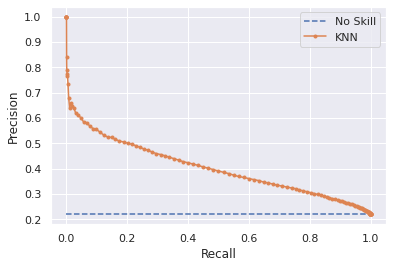

In [ ]:
k_precision, k_recall, _ = precision_recall_curve(y_test, y_prob_knn) 
k_auc = auc(k_recall, k_precision)

# Imprimimos AUC
print('KNN: auc=%.3f' %k_auc)

# Dibujamos la curva para el modelo
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(k_recall, k_precision, marker='.', label='KNN')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Mostramos el gráfico
plt.show()

### C. Árbol de decisión simple (1 pt)

best mean cross-validation score: 0.651
best parameters: {'max_depth': 7}


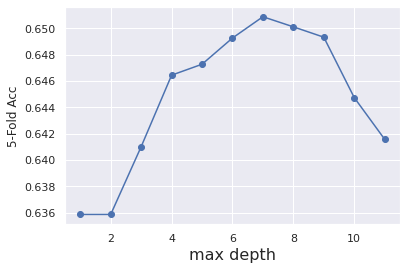

In [ ]:
# TARDA 1'
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,12)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_scaled_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']

treeModel = DecisionTreeClassifier(max_depth = maxDepthOptimo).fit(X_train_scaled_res,y_train_res)

[Text(0.5, 0.9375, 'grade <= -0.258\ngini = 0.5\nsamples = 155274\nvalue = [77637, 77637]\nclass = Fully Paid'),
 Text(0.25, 0.8125, 'grade <= -1.01\ngini = 0.428\nsamples = 55713\nvalue = [38405, 17308]\nclass = Fully Paid'),
 Text(0.125, 0.6875, 'fico_range_low <= 0.474\ngini = 0.321\nsamples = 19257\nvalue = [15389, 3868]\nclass = Fully Paid'),
 Text(0.0625, 0.5625, 'dti <= -0.083\ngini = 0.38\nsamples = 8148\nvalue = [6070, 2078]\nclass = Fully Paid'),
 Text(0.03125, 0.4375, 'sub_grade <= 1.07\ngini = 0.341\nsamples = 4948\nvalue = [3868, 1080]\nclass = Fully Paid'),
 Text(0.015625, 0.3125, 'mo_sin_old_rev_tl_op <= -1.11\ngini = 0.314\nsamples = 2921\nvalue = [2352, 569]\nclass = Fully Paid'),
 Text(0.0078125, 0.1875, 'emp_length <= -0.461\ngini = 0.456\nsamples = 128\nvalue = [83, 45]\nclass = Fully Paid'),
 Text(0.00390625, 0.0625, 'gini = 0.398\nsamples = 84\nvalue = [61, 23]\nclass = Fully Paid'),
 Text(0.01171875, 0.0625, 'gini = 0.5\nsamples = 44\nvalue = [22, 22]\nclass = Fu

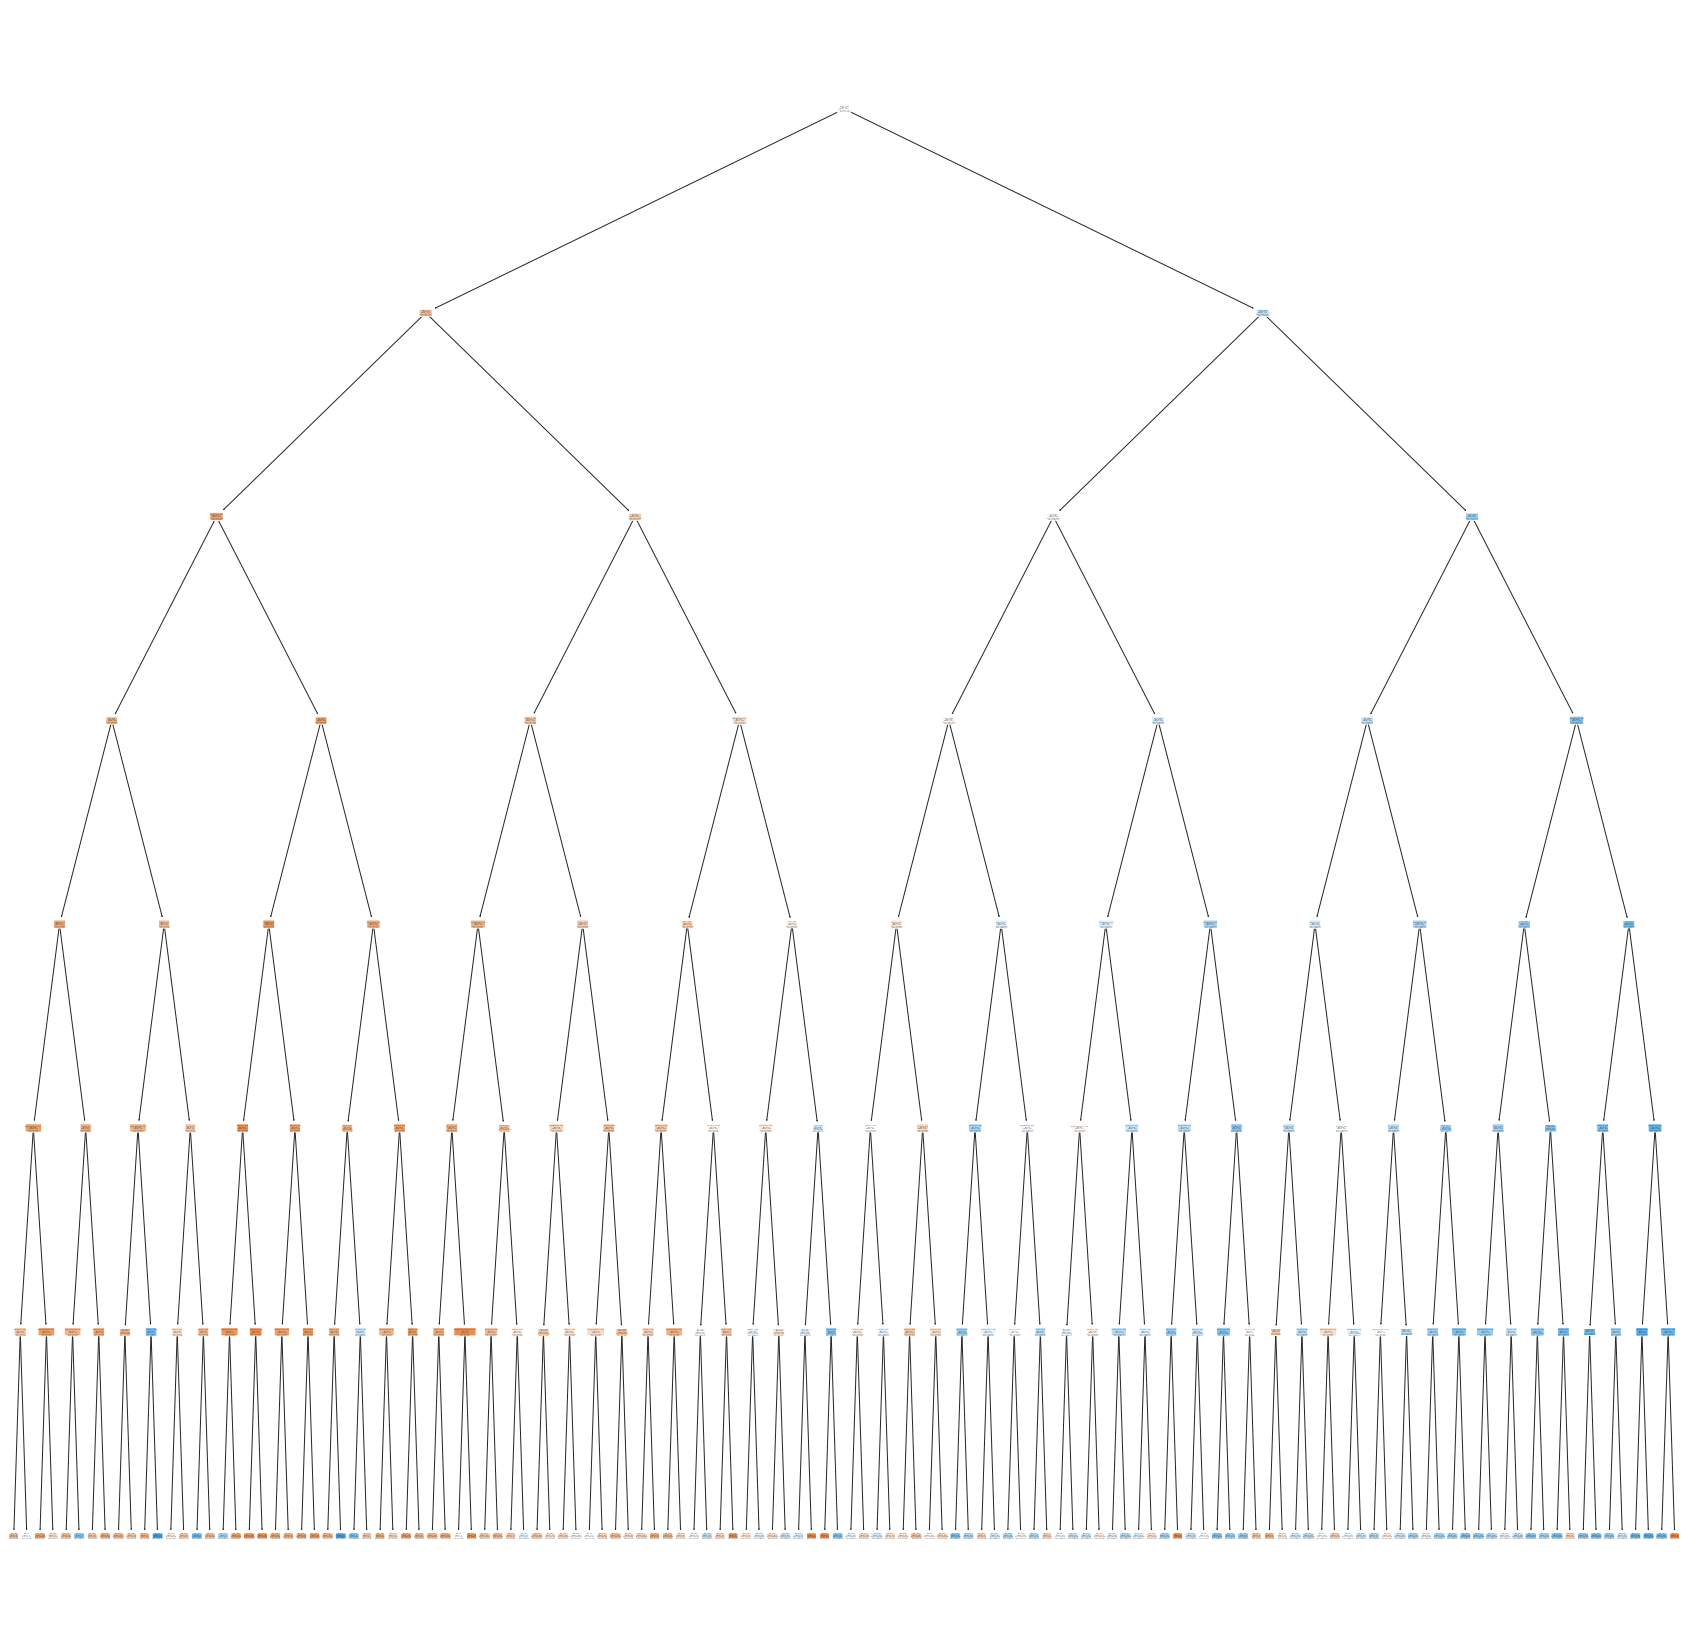

In [ ]:
from sklearn import tree

features = X_train_scaled_res.columns 
plt.figure(figsize=(30, 30))
tree.plot_tree(treeModel, feature_names=features, class_names=['Fully Paid','Charged Off'], 
                        filled=True, rounded=True)

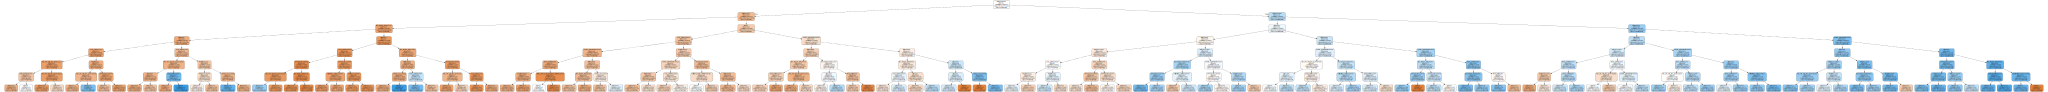

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

features = X_train_scaled_res.columns 

dot_data = export_graphviz(treeModel, out_file=None, 
                         feature_names = features, class_names=['Fully Paid','Charged Off'] ,
                         filled = True, rounded=True,  
                         special_characters = True)

graph = graphviz.Source(dot_data) 

graph

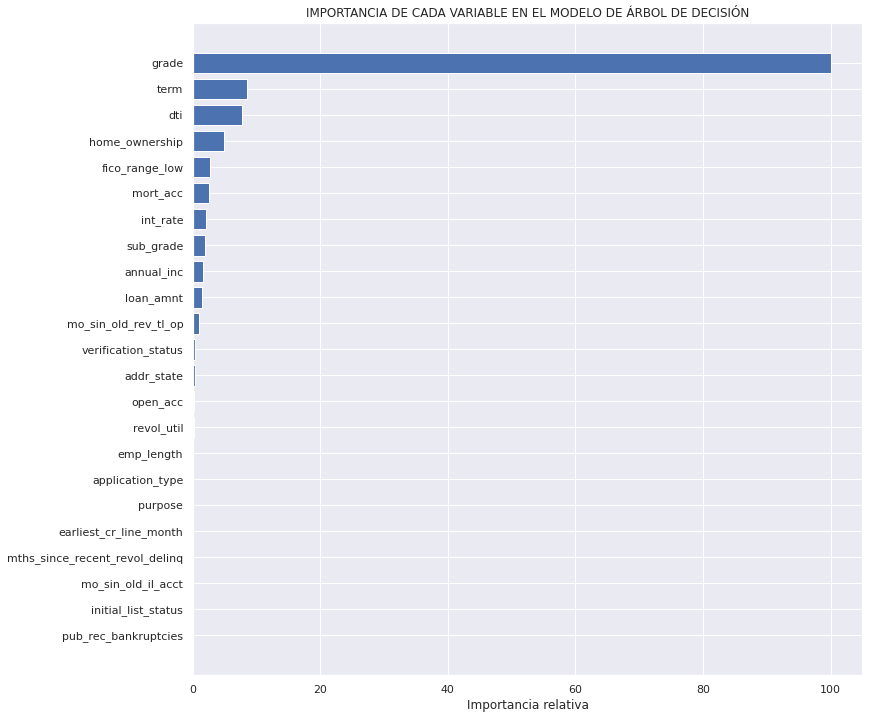

In [ ]:
feature_importance = treeModel.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_scaled_res.keys()[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('IMPORTANCIA DE CADA VARIABLE EN EL MODELO DE ÁRBOL DE DECISIÓN')
plt.show()

In [ ]:
# Modelo con el conjunto de datos de entrenamiento
print("Train: ",treeModel.score(X_train_scaled_res,y_train_res))

Train:  0.65798523899687


**Métricas:**

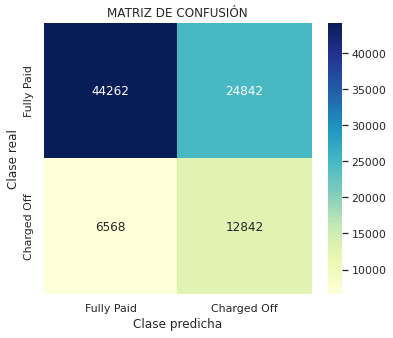

In [ ]:
y_pred_tree = treeModel.predict(X_test_scaled) 
LABELS = ["Fully Paid","Charged Off"]
confmat_test_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 5)) # Tamaño de la figura
sns.set(font_scale=1) # Para el tamaño de la letra
sns.heatmap(confmat_test_tree, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu"); # Hacemos un mapa de calor para visualizar mejor la matriz
plt.title("MATRIZ DE CONFUSIÓN")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

In [ ]:
print("Atendiendo a la diagonal de la matriz, de %d casos, predecimos correctamente %d. Sin embargo, hay un total de %d observaciones mal clasificadas." % (X_test_scaled.shape[0], confmat_test_tree[0,0] + confmat_test_tree[1,1],confmat_test_tree[0,1]+ confmat_test_tree[1,0] ))
print("Haciendo el cociente, tenemos el accuracy: %f." % ((confmat_test_tree[0,0] + confmat_test_tree[1,1])/X_test_scaled.shape[0]))
print("En cuanto a los elementos que no se encuentran en la diagonal tenemos que %d préstamos pagados han sido clasificados como impagados y %d impagados han sido clasificados como pagados. " % (confmat_test_tree[0,1], confmat_test_tree[1,0]))

Atendiendo a la diagonal de la matriz, de 88514 casos, predecimos correctamente 57104. Sin embargo, hay un total de 31410 observaciones mal clasificadas.
Haciendo el cociente, tenemos el accuracy: 0.645141.
En cuanto a los elementos que no se encuentran en la diagonal tenemos que 24842 préstamos pagados han sido clasificados como impagados y 6568 impagados han sido clasificados como pagados. 


In [ ]:
prec_tree = precision_score(y_test,y_pred_tree)
acc_tree = accuracy_score(y_test,y_pred_tree)
recall_tree = recall_score(y_test,y_pred_tree)
f1_tree = f1_score(y_test,y_pred_tree)

print('Accuracy del modelo: ', acc_tree)
print('Precisión del modelo', prec_tree)
print('Recall del modelo es: ', recall_tree)
print('F1_score del modelo es: ', f1_tree)

Accuracy del modelo:  0.6451408816684366
Precisión del modelo 0.34078123341471184
Recall del modelo es:  0.661617722823287
F1_score del modelo es:  0.44985462570497775


ACC:  0.6451408816684366
SEN:  0.661617722823287
ESP:  0.6405128501968048
PPV:  0.34078123341471184
FSC:  0.44985462570497775


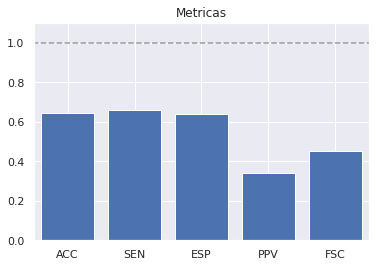

In [ ]:
calcula_metricas(confmat_test_tree)

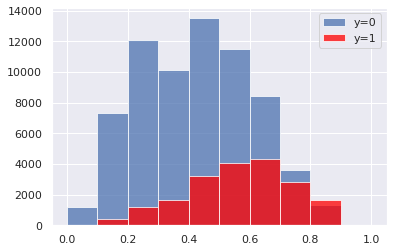

In [ ]:
y_prob_tree = treeModel.predict_proba(X_test_scaled)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_tree[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_tree[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend(loc=1)
plt.show()

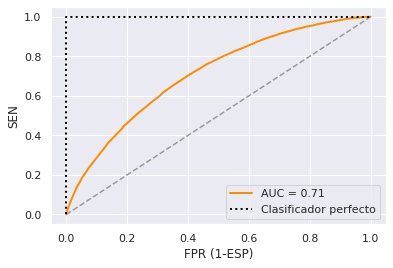

In [ ]:
ejex, ejey, _ = roc_curve(y_test, y_prob_tree)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_tree = roc_auc
print('El área bajo la curva ROC es:', roc_auc_tree)

El área bajo la curva ROC es: 0.7079897886141999


Árbol de decisión: auc=0.393


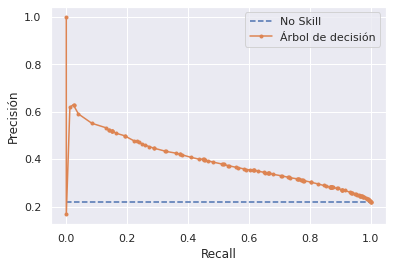

In [ ]:
dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_prob_tree)
dt_auc = auc(dt_recall, dt_precision)

# Imprimimos AUC
print('Árbol de decisión: auc=%.3f' %dt_auc)

# Dibujamos la curva para el modelo
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(dt_recall, dt_precision, marker='.', label='Árbol de decisión')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.legend()

# Mostramos el gráfico
plt.show()

### D. Bagging Classifier (1 pt)

Este clasificador combina las predicciones de numerosos árboles de decisión. Hemos realizado el modelo teniendo en cuenta los resultados del algoritmo de árboles de decisión del apartado anterior.

In [ ]:
# Tarda 3'
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, max_samples=0.8, bootstrap=True, oob_score=True, random_state=0)
bag_model.fit(X_train_scaled_res, y_train_res)
bag_model.oob_score_

0.6483764184602703

In [ ]:
# Modelo en el conjunto de datos de entrenamiento
print("Train: ",bag_model.score(X_train_scaled_res,y_train_res))

Train:  0.9997166299573657


**Métricas:**

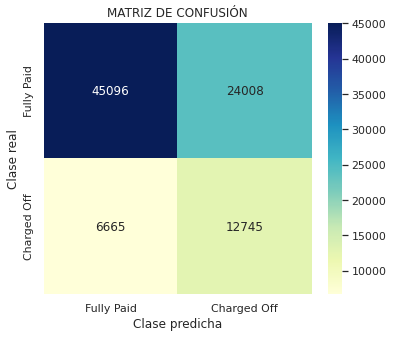

In [ ]:
y_pred_bc = bag_model.predict(X_test_scaled) 
LABELS = ["Fully Paid","Charged Off"]
confmat_test_bc = confusion_matrix(y_test, y_pred_bc)

plt.figure(figsize=(6, 5)) # Tamaño de la figura
sns.set(font_scale=1) # Para el tamaño de la letra
sns.heatmap(confmat_test_bc, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu"); # Hacemos un mapa de calor para visualizar mejor la matriz
plt.title("MATRIZ DE CONFUSIÓN")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

In [ ]:
print("Atendiendo a la diagonal de la matriz, de %d casos, predecimos correctamente %d. Sin embargo, hay un total de %d observaciones mal clasificadas." % (X_test_scaled.shape[0], confmat_test_bc[0,0] + confmat_test_bc[1,1],confmat_test_bc[0,1]+ confmat_test_bc[1,0] ))
print("Haciendo el cociente, tenemos el accuracy: %f." % ((confmat_test_bc[0,0] + confmat_test_bc[1,1])/X_test_scaled.shape[0]))
print("En cuanto a los elementos que no se encuentran en la diagonal tenemos que %d préstamos pagados han sido clasificados como impagados y %d impagados han sido clasificados como pagados. " % (confmat_test_bc[0,1], confmat_test_bc[1,0]))

Atendiendo a la diagonal de la matriz, de 88514 casos, predecimos correctamente 57841. Sin embargo, hay un total de 30673 observaciones mal clasificadas.
Haciendo el cociente, tenemos el accuracy: 0.653467.
En cuanto a los elementos que no se encuentran en la diagonal tenemos que 24008 préstamos pagados han sido clasificados como impagados y 6665 impagados han sido clasificados como pagados. 


In [ ]:
prec_bc = precision_score(y_test,y_pred_bc)
acc_bc = accuracy_score(y_test,y_pred_bc)
recall_bc = recall_score(y_test,y_pred_bc)
f1_bc = f1_score(y_test,y_pred_bc)

print('Accuracy del modelo: ', acc_bc)
print('Precisión del modelo', prec_bc)
print('Recall del modelo es: ', recall_bc)
print('F1_score del modelo es: ', f1_bc)

Accuracy del modelo:  0.6534672481189416
Precisión del modelo 0.34677441297309064
Recall del modelo es:  0.6566202988150438
F1_score del modelo es:  0.4538575218560263


ACC:  0.6534672481189416
SEN:  0.6566202988150438
ESP:  0.6525816161148414
PPV:  0.34677441297309064
FSC:  0.4538575218560263


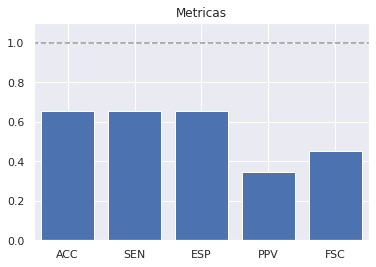

In [ ]:
calcula_metricas(confmat_test_bc)

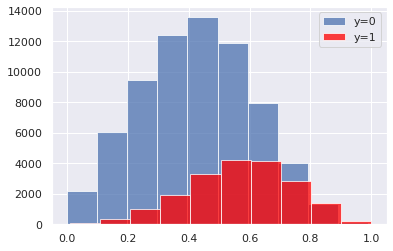

In [ ]:
y_prob_bc = bag_model.predict_proba(X_test_scaled)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_bc[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_bc[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend(loc=1)
plt.show()

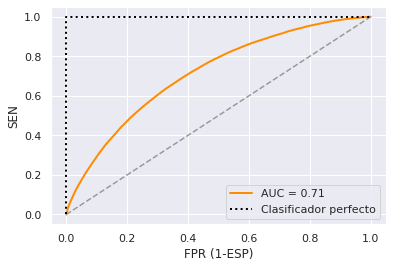

In [ ]:
ejex, ejey, _ = roc_curve(y_test, y_prob_bc)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_bc = roc_auc
print('El área bajo la curva ROC es:', roc_auc_bc)

El área bajo la curva ROC es: 0.7122136438336818


Bagging Classifier: auc=0.417


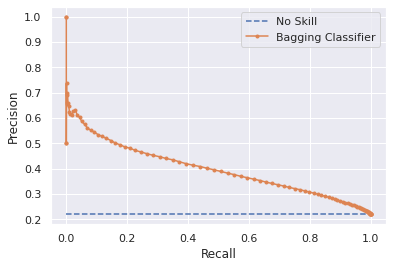

In [ ]:
#Curva precision-recall

bc_precision, bc_recall, _ = precision_recall_curve(y_test, y_prob_bc) 
bc_auc =  auc(lr_recall, lr_precision)
# Imprimimos AUC
print('Bagging Classifier: auc=%.3f' %bc_auc)

# Dibujamos la curva para el modelo
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(bc_recall, bc_precision, marker='.', label='Bagging Classifier')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Mostramos el gráfico
plt.show()

### E. Random Forest (1 pt)

best mean cross-validation score: 0.661
best parameters: {'max_depth': 14}


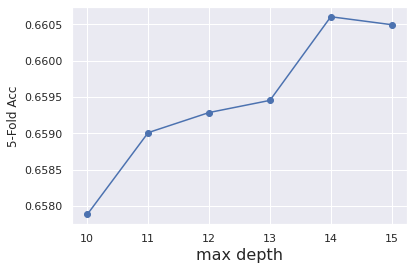

In [ ]:
# Tarda 11'

from sklearn.ensemble import RandomForestClassifier

# Grid search
maxDepth   = range(10,16) #Como ya hemos probado muchas veces, acotamos el rango para que tarde menos en ejecutar
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 100, random_state=0), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_scaled_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth', fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
# Tarda 1'

maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestClassifier(n_estimators = 200, max_depth=maxDepthOptimo).fit(X_train_scaled_res,y_train_res)

#Modelo en el conjunto de datos de entrenamiento
print("Train: ",rf.score(X_train_scaled_res,y_train_res))

Train:  0.7777863647487667


**Métricas:**

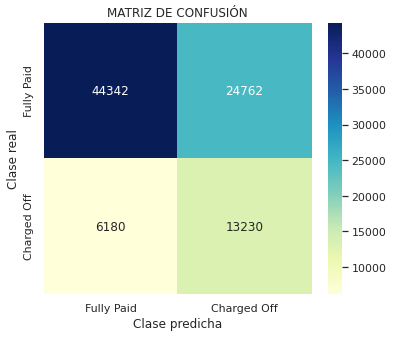

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)
LABELS = ["Fully Paid","Charged Off"]
confmat_test_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5)) # Tamaño de la figura
sns.set(font_scale=1) # Para el tamaño de la letra
sns.heatmap(confmat_test_rf, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu"); # Hacemos un mapa de calor para visualizar mejor la matriz
plt.title("MATRIZ DE CONFUSIÓN")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

In [ ]:
print("Atendiendo a la diagonal de la matriz, de %d casos, predecimos correctamente %d. Sin embargo, hay un total de %d observaciones mal clasificadas." % (X_test_scaled.shape[0], confmat_test_rf[0,0] + confmat_test_rf[1,1],confmat_test_rf[0,1]+ confmat_test_rf[1,0] ))
print("Haciendo el cociente, tenemos el accuracy: %f." % ((confmat_test_rf[0,0] + confmat_test_rf[1,1])/X_test_scaled.shape[0]))
print("En cuanto a los elementos que no se encuentran en la diagonal tenemos que %d préstamos pagados han sido clasificados como impagados y %d impagados han sido clasificados como pagados. " % (confmat_test_rf[0,1], confmat_test_rf[1,0]))

Atendiendo a la diagonal de la matriz, de 88514 casos, predecimos correctamente 57572. Sin embargo, hay un total de 30942 observaciones mal clasificadas.
Haciendo el cociente, tenemos el accuracy: 0.650428.
En cuanto a los elementos que no se encuentran en la diagonal tenemos que 24762 préstamos pagados han sido clasificados como impagados y 6180 impagados han sido clasificados como pagados. 


In [ ]:
prec_rf = precision_score(y_test,y_pred_rf)
acc_rf = accuracy_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)

print('Accuracy del modelo: ', acc_rf)
print('Precisión del modelo', prec_rf)
print('Recall del modelo es: ', recall_rf)
print('F1_score del modelo es: ', f1_rf)

Accuracy del modelo:  0.6504281808527465
Precisión del modelo 0.34823120656980416
Recall del modelo es:  0.6816074188562596
F1_score del modelo es:  0.46095954844778925


ACC:  0.6504281808527465
SEN:  0.6816074188562596
ESP:  0.6416705255846261
PPV:  0.34823120656980416
FSC:  0.46095954844778925


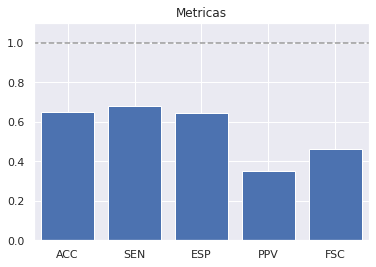

In [ ]:
calcula_metricas(confmat_test_rf)

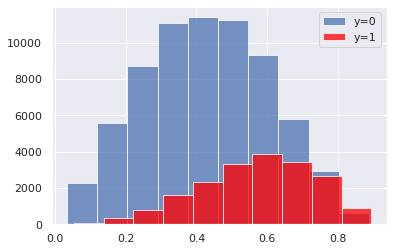

In [ ]:
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_rf[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_rf[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend(loc=1)
plt.show()

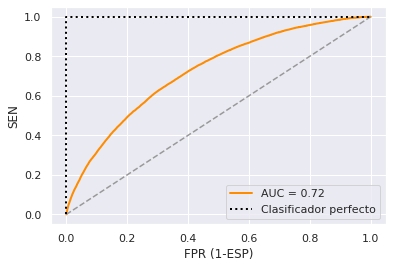

In [ ]:
ejex, ejey, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_rf = roc_auc
print('El área bajo la curva ROC es:', roc_auc_rf)

El área bajo la curva ROC es: 0.7237834835687036


Random Forest: auc=0.420


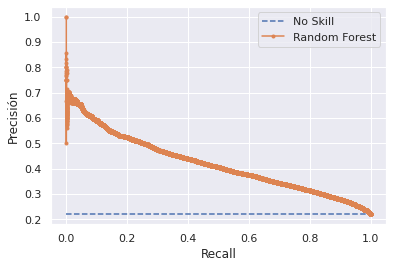

In [ ]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_prob_rf) 
rf_auc = auc(rf_recall, rf_precision)

# Imprimimos AUC
print('Random Forest: auc=%.3f' %rf_auc)

# Dibujamos la curva para el modelo
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.legend()

# Mostramos el gráfico
plt.show()

### F. Gradient Boost (1 pt)

Este algoritmo depende de varios parámetros. Como el GridSearch tardaba demasiado, hemos implementado el código del notebook del CV: 03-Encoding.

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import make_scorer

#creating Scoring parameter: 
#scoring = {'accuracy': make_scorer(accuracy_score),
           #'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

#parameters = {"loss":["deviance"],
    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    #"max_depth":[3,5,8],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    #"n_estimators":[10]
    #}
#passing the scoring function in the GridSearchCV
#clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

#clf.fit(X_train_scaled_res, y_train_res)


In [ ]:
# Tarda 3' 26''

from sklearn.ensemble import GradientBoostingClassifier

#Llamamos al modelo
#El GridSearch para sacar los parámetros óptimos tardaba mucho en ejecutar así que hemos utilizado
# los del nb 03-Encoding
clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)

# Ajustamos
grad_bo = clf.fit(X_train_scaled_res, y_train_res)

      Iter       Train Loss   Remaining Time 
         1           1.3614            1.99m
         2           1.3413            1.99m
         3           1.3244            1.96m
         4           1.3102            1.95m
         5           1.2985            1.94m
         6           1.2886            1.92m
         7           1.2801            1.91m
         8           1.2729            1.90m
         9           1.2669            1.88m
        10           1.2616            1.86m
        20           1.2332            1.77m
        30           1.2223            1.71m
        40           1.2156            1.63m
        50           1.2105            1.53m
        60           1.2068            1.37m
        70           1.2038            1.21m
        80           1.2008            1.03m
        90           1.1987           49.92s
       100           1.1964           37.79s


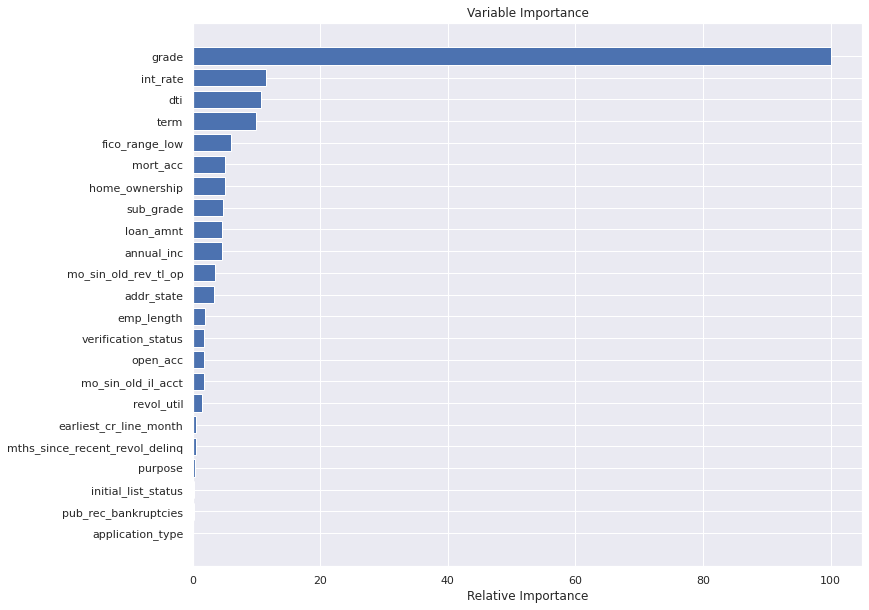

In [ ]:
feature_importance = grad_bo.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_scaled_res.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_test = grad_bo.predict_proba(X_test_scaled)
pred_train = grad_bo.predict_proba(X_train_scaled_res)

In [ ]:
# Modelo con el conjunto de datos de entrenamiento
print("Train: ",grad_bo.score(X_train_scaled_res,y_train_res))

Train:  0.6791993508249933


**Métricas:**

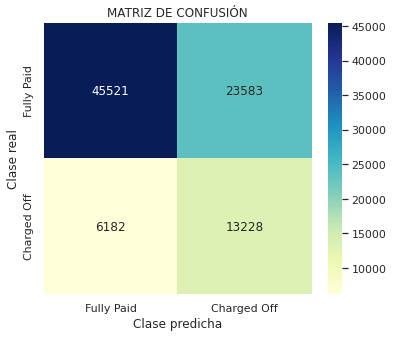

In [ ]:
y_pred_grad_bo = grad_bo.predict(X_test_scaled)

LABELS = ["Fully Paid","Charged Off"]
confmat_test_grad_boo = confusion_matrix(y_test, y_pred_grad_bo)

plt.figure(figsize=(6, 5)) # Tamaño de la figura
sns.set(font_scale=1) # Para el tamaño de la letra
sns.heatmap(confmat_test_grad_boo, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu"); # Hacemos un mapa de calor para visualizar mejor la matriz
plt.title("MATRIZ DE CONFUSIÓN")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

In [ ]:
print("Atendiendo a la diagonal de la matriz, de %d casos, predecimos correctamente %d. Sin embargo, hay un total de %d observaciones mal clasificadas." % (X_test_scaled.shape[0], confmat_test_grad_boo[0,0] + confmat_test_grad_boo[1,1],confmat_test_grad_boo[0,1]+ confmat_test_grad_boo[1,0] ))
print("Haciendo el cociente, tenemos el accuracy: %f." % ((confmat_test_grad_boo[0,0] + confmat_test_grad_boo[1,1])/X_test_scaled.shape[0]))
print("En cuanto a los elementos que no se encuentran en la diagonal tenemos que %d préstamos pagados han sido clasificados como impagados y %d impagados han sido clasificados como pagados. " % (confmat_test_grad_boo[0,1], confmat_test_grad_boo[1,0]))

Atendiendo a la diagonal de la matriz, de 88514 casos, predecimos correctamente 58749. Sin embargo, hay un total de 29765 observaciones mal clasificadas.
Haciendo el cociente, tenemos el accuracy: 0.663726.
En cuanto a los elementos que no se encuentran en la diagonal tenemos que 23583 préstamos pagados han sido clasificados como impagados y 6182 impagados han sido clasificados como pagados. 


**Métricas:**

In [ ]:
prec_grad_bo = precision_score(y_test,y_pred_grad_bo)
acc_grad_bo = accuracy_score(y_test,y_pred_grad_bo)
recall_grad_bo = recall_score(y_test,y_pred_grad_bo)
f1_grad_bo = f1_score(y_test,y_pred_grad_bo)

print('Accuracy del modelo: ', acc_grad_bo)
print('Precisión del modelo', prec_grad_bo)
print('Recall del modelo es: ', recall_grad_bo)
print('F1_score del modelo es: ', f1_grad_bo)

Accuracy del modelo:  0.6637255123483291
Precisión del modelo 0.3593491076037054
Recall del modelo es:  0.6815043791859866
F1_score del modelo es:  0.47057149463723524


ACC:  0.6637255123483291
SEN:  0.6815043791859866
ESP:  0.6587317666126418
PPV:  0.3593491076037054
FSC:  0.47057149463723524


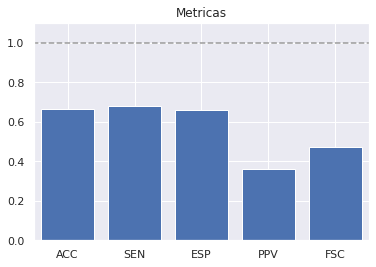

In [ ]:
calcula_metricas(confmat_test_grad_boo)

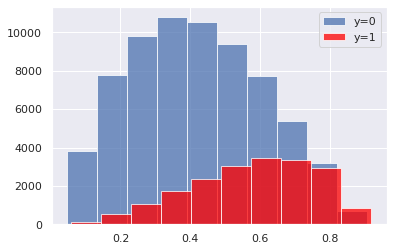

In [ ]:
y_prob_grad_bo = grad_bo.predict_proba(X_test_scaled)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_grad_bo[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_grad_bo[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend(loc=1)
plt.show()

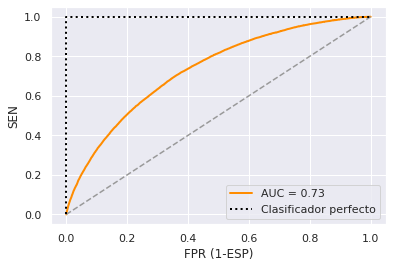

In [ ]:
ejex, ejey, _ = roc_curve(y_test, y_prob_grad_bo)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_grad_bo = roc_auc
print('El área bajo la curva ROC es:', roc_auc_grad_bo)

El área bajo la curva ROC es: 0.7320449728855842


Gradient Boost: auc=0.429


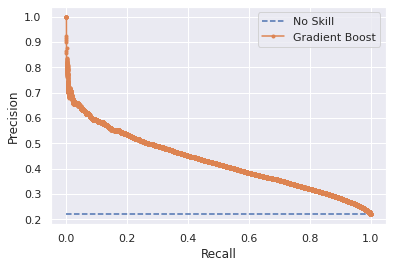

In [ ]:
#Curva precision-recall

grad_bo_precision, grad_bo_recall, _ = precision_recall_curve(y_test, y_prob_grad_bo) 
grad_bo_f1, grad_bo_auc = f1_score(y_test, y_pred_grad_bo), auc(grad_bo_recall, grad_bo_precision)
# Imprimimos AUC
print('Gradient Boost: auc=%.3f' %grad_bo_auc)

# Dibujamos la curva para el modelo
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(grad_bo_recall, grad_bo_precision, marker='.', label='Gradient Boost')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Mostramos el gráfico
plt.show()

### G. XGBoost (1 pt)

## Métricas

*6.-  ¿Cuál de todas las métricas crees que es la más conveniente? Ordena todos los métodos de mejor a peor según dichas métricas. (0,5pt)*


Consideramos que la métrica más importante es el `Recall` ya que mide de entre todos los préstamos realmente no devueltos, cuántos han sido clasificados como tal. En nuestro modelo estamos interesados en detectar el fraude y, será peor para nosotros clasificar un préstamo como pagado cuando no lo es realmente, que clasificarlo como impagado y que finalmente sí que se devuelva. Es decir, el coste de un falso negativo es mayor que el de un falso positivo y, por tanto, estamos interesados en medir la sensibilidad/recall de cada algoritmo.


$$Recall =  \frac{TP} {TP+FN}$$

Donde:
- TP: Los que clasifica como no devueltos y son realmente no devueltos.
- FN: Los que clasifica como pagados y son realmente impagados

In [ ]:
models = pd.DataFrame({
    'Modelo' : ['Regresión logística', 'KNN', 'Árbol de decisión', 'Random Forest', 'Bagging Classifier', 'Gradient Boost'], # Ponemos los nombres de
    # los modelos y al final nos saca una tabla ordenando de mayor a menor los modelos por su accuracy para compararlos
    'Accuracy' : [acc_logr, acc_knn, acc_tree, acc_rf, acc_bc, acc_grad_bo],
    'Precisión' :[prec_logr, prec_knn, prec_tree, prec_rf, prec_bc, prec_grad_bo],
    'Recall' : [recall_logr, recall_knn, recall_tree, recall_rf, recall_bc, recall_grad_bo],
    'F_SCORE' : [f1_logr, f1_knn, f1_tree, f1_rf, f1_bc, f1_grad_bo],
    'AUC_ROC' : [roc_auc_logr, roc_auc_knn, roc_auc_tree, roc_auc_rf, roc_auc_bc, roc_auc_grad_bo]
})
models.sort_values(by = 'Recall', ascending = False)

,Modelo,Accuracy,Precisión,Recall,F_SCORE,AUC_ROC
3,Random Forest,0.650428,0.348231,0.681607,0.460960,0.723783
5,Gradient Boost,0.663726,0.359349,0.681504,0.470571,0.732045
2,Árbol de decisión,0.645141,0.340781,0.661618,0.449855,0.707990
4,Bagging Classifier,0.653467,0.346774,0.656620,0.453858,0.712214
1,KNN,0.655546,0.347123,0.648016,0.452080,0.712851
0,Regresión logística,0.671080,0.359915,0.642246,0.461311,0.723410


Atendiendo a la métrica `Recall`, observamos que el mejor modelo de los tres que se demandaban en la práctica es el algoritmo de *árbol de decisión* con un recall de 0.66, seguido del *KNN* y finalmente, en tercer lugar estaría la *regresión logística*. Si incluimos en el análisis los otros tres algoritmos que hemos incorporado por nuestra cuenta, el mejor en base a la métrica recall sería *random forest*. 

In [ ]:
import plotly.express as px

df_melt=models.melt(id_vars = 'Modelo', value_vars = ['Accuracy', 'Precisión', 'Recall', 'F_SCORE', 'AUC_ROC'])

px.bar(df_melt, x='Modelo', y='value', facet_col='variable', facet_col_wrap=5, color='variable')

## Ensamblado 

*7.-  En esta práctica no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo , los ensambladores nos pueden dar una buena pista, de que variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación (0,5pt)*

Existen ciertas estrategias de regularización, como pueden ser *ridge* *Lasso* o *Elastic Net* que fuerzan a que los coeficientes de un modelo de regresión lineal tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes.

Nosotros vamos a usar el método *Lasso*. Gracias a él podemos ajustar el modelo conteniendo todos los predictores posibles y emplear esta regularización para realizar una selección de variables predictoras.

Buscaremos un parámetro alpha que, al aumentar, disminuye la flexibilidad del ajuste de la regresión *Lasso*, lo que conlleva a una disminución de la varianza pero a un incremento del sesgo. Es un procedimiento más restrictivo que otros a la hora de estimar los coeficientes y, dependiendo del valor de alpha, puede fijar un número de ellos exactamente en 0. Esto significa que en el modelo final la variable de respuesta solo estará relacionada con un pequeño subconjunto de los predictores; es decir, aquellos con estimaciones de coeficientes no nulos. Por tanto, la selección de un buen valor de alpha es fundamental.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+04, tolerance: 3.882e+00



best mean cross-validation score: -0.298
best parameters: {'alpha': 1e-20}


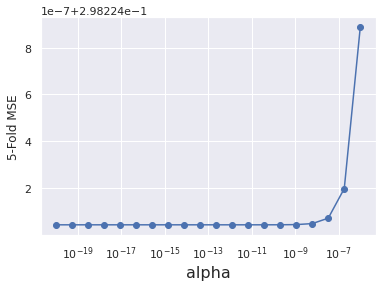

In [ ]:
# TARDA  18  MINUTOS 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

features = X_train_scaled_res.columns 

alpha_vector = np.logspace(-20,-6,20) #Poniendo 50 tarda una eternindad, con 20 sí compilaba al menos
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, n_jobs=-1)
grid.fit(X_train_scaled_res, y_train_res)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train_scaled_res,y_train_res)

ytrainLasso = lasso.predict(X_train_scaled_res)
ytestLasso  = lasso.predict(X_test_scaled)
mseTrainModelLasso = mean_squared_error(y_train_res,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = data2.columns[1:] 

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.214
MSE Modelo Lasso (test) : 0.213
RMSE Modelo Lasso (train): 0.462
RMSE Modelo Lasso (test) : 0.461
emp_length -0.004296770970220724
mo_sin_old_il_acct -0.0026500847411278245
revol_util -0.0019460641724286577
dti -0.002140851118692481
fico_range_low 0.041869655609530154
earliest_cr_line_month -0.04287474154100176
open_acc -0.0013131961362583741
mo_sin_old_rev_tl_op 0.008025133000937086
mort_acc -0.005048641068408365
loan_amnt -0.02683680177397452
pub_rec_bankruptcies 0.007885828058086136
application_type -0.001327299999818421
initial_list_status -0.010961912681581993
verification_status -0.002703833316473191
addr_state 0.01691302238906178
purpose 0.0011590309889036973
loan_status -2.4347551394810672e-06
int_rate -0.2646951564141885
term 0.05109972840668429
grade 0.365519318732857
sub_grade 0.0754325350965454
home_ownership 0.0260627378899142
annual_inc -0.009531433388500264


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+04, tolerance: 3.882e+00



In [ ]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train_scaled_res,y_train_res)

ytrainLasso = lasso.predict(X_train_scaled_res)
ytestLasso  = lasso.predict(X_test_scaled)
mseTrainModelLasso = mean_squared_error(10**y_train_res,10**ytrainLasso)
mseTestModelLasso = mean_squared_error(10**y_test,10**ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = data2.columns[1:] 

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 22
MSE Modelo Lasso (test) : 1.02e+05
RMSE Modelo Lasso (train): 4.69
RMSE Modelo Lasso (test) : 319
emp_length -0.004296770970220724
mo_sin_old_il_acct -0.0026500847411278245
revol_util -0.0019460641724286577
dti -0.002140851118692481
fico_range_low 0.041869655609530154
earliest_cr_line_month -0.04287474154100176
open_acc -0.0013131961362583741
mo_sin_old_rev_tl_op 0.008025133000937086
mort_acc -0.005048641068408365
loan_amnt -0.02683680177397452
pub_rec_bankruptcies 0.007885828058086136
application_type -0.001327299999818421
initial_list_status -0.010961912681581993
verification_status -0.002703833316473191
addr_state 0.01691302238906178
purpose 0.0011590309889036973
loan_status -2.4347551394810672e-06
int_rate -0.2646951564141885
term 0.05109972840668429
grade 0.365519318732857
sub_grade 0.0754325350965454
home_ownership 0.0260627378899142
annual_inc -0.009531433388500264


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+04, tolerance: 3.882e+00

